In [1]:
import numpy as np
import pandas as pd
import math
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from astropy.io import ascii

In [2]:
def ArnettFit(M_N,MejE,tstart):
    # constants
    M_sun = 2e33
    c = 3e10

    #params to fit:
    #E_K=3.3737988d+51
    #M_ej 3.1629364*M_sun
    # MejE = Mej^(3/4)*Ek^(-1/4)
    

    M_Ni = M_N*M_sun
    M_ejE_K = MejE*((M_sun)**3/(1e51))**(0.25)

    # time vector (sec)
    #dt = (np.arange(103.*4)/4.+0.25)*86400.
    dt = (np.arange(tstart,303, 0.25))*86400.

    beta=13.8 # constant of integration (Arnett 1982)
    k_opt=0.05 # g cm^-2 optical opacity

    tau_Ni=8.8*86400. # decay time of Ni56 in sec
    tau_Co=9.822e6 # decay time of Co56 in sec

    e_Ni=3.90e10 # erg/s/g energy produced by 1 gram of Ni
    e_Co=6.78e9 # erg/s/g energy produced by 1 gram of Co

    # tau_m is the timescale of the light-curve
    #tau_m_test=double(((k_opt/(beta*c))^0.5)*((10.*M_ej^3./(3.*E_K))^(0.25)))
    tau_m = (((k_opt/(beta*c))**0.5)*((10./3.)**(0.25))*M_ejE_K)

    # integrate up the A(z) factor where z goes from 0 to x
    int_A= np.zeros(len(dt))
    int_B= np.zeros(len(dt))
    L_ph= np.zeros(len(dt))

    x=(dt/tau_m)
    y=(tau_m/(2.*tau_Ni))
    s=(tau_m*(tau_Co-tau_Ni)/(2.*tau_Co*tau_Ni))

    for i in range(len(dt)):
        z = np.arange(100)*x[i]/100.
        Az = 2.*z*np.exp(-2.*z*y+z**2.)
        Bz = 2.*z*np.exp(-2.*z*y+2.*z*s+z**2.)
        int_A[i] = integrate.simps(Az,z)
        int_B[i] = integrate.simps(Bz,z)
        L_ph[i] = ((M_Ni*np.exp(-1.*x[i]**2.))*((e_Ni-e_Co)*int_A[i]+e_Co*int_B[i]))

       
    return dt, L_ph#data = (np.array(mni),np.array(mekej),t,np.array(lum))
                   
                   
#print(L_ph)
#print(dt)                 

In [3]:
def ValentiNebFit(MNi,Fs,tstart,fulltrap=False):
  #variables
   # Mej_sol = 5  #1-10 solar masses
   # Ek_51 =  2e51  #1e51 ergs
   # Fs = (32*Mej_sol)/math.sqrt(Ek_51)
    #MNi = 2 # mass of nickel ranges from 0.1-2
    #tstart = 150

  #constants
    M_sun = 2e33
    c = 3e10
    tau_Ni = 8.8*86400  #decay time of Ni56 in sec
    tau_Co=9.822e6   #decay time of Co56 in sec
    e_Ni=3.90e10   # erg/s/g energy produced by 1 gram of Ni
    e_Co=6.78e9   #erg/s/g energy produced by 1 gram of Co
    
    
    #Parameters
    M_Ni = MNi*M_sun
    F = Fs
    G = 16.1*F

    # time vector in days starting at tstart days post-explosion.
    dt = (np.arange(tstart,500,1))#*86400.
    
#equations;;;;;;;;;;;;;;;;;

    #Nickel source term
    S_Ni = M_Ni*e_Ni*np.exp(-(dt*86400.)/tau_Ni)

    #Cobalt Source terms:
    Epsilon = M_Ni*e_Co*(np.exp(-(dt*86400.)/tau_Co) - np.exp(-(dt*86400.)/tau_Ni))

    S_Co1 = 0.81*Epsilon*(1-np.exp(-(F/dt)**2.))
    S_Co2 = 0.164*Epsilon*(1-np.exp(-(F/dt)**2.))*(1-np.exp(-(G/dt)**2.))
    S_Co3 = 0.036*Epsilon*(1-np.exp(-(G/dt)**2.))

    #Lum = np.zeros(len(dt))
    
    if fulltrap:
        S_Co1 = 0.81*Epsilon
        S_Co2 = 0.164*Epsilon
        S_Co3 = 0.036*Epsilon
    #Total Luminosity
    Lum = S_Ni + S_Co1 + S_Co2 + S_Co3  #This should be in erg/s
    
    return dt,Lum
    
#print(Lum)
#print(dt)    

<ipython-input-4-7f9313f4d7f3>:18: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(t,np.log10(luma),fmt = 'ko',ms =10,label = r'Bol LC:t$_{exp}$ = -5.5 days')
<ipython-input-4-7f9313f4d7f3>:19: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(t,np.log10(luma),fmt='k', ms =10,linewidth = 5)
<ipython-input-4-7f9313f4d7f3>:20: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(t100,np.log10(luma),fmt = 'co',ms =10,label = r'Bol LC:t$_{exp}$ = -100 days', linewidth = 5)
<ipython-input-4-7f9313f4d7f3>:21: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(t100,np.log10(luma), fmt='c',ms =10, linewidth = 5)
<ipython-input-2-8803c1a26bb5>:47: RuntimeWarning: overflow encountered in double_scalars
  L_ph[i] = ((M_Ni*np.exp(-1.*x[i]**2.))*((e_Ni-e_Co)*int_A[i]+e_Co*int_B[i]))
<ipython-input-2-8803c1a26bb5>:44: RuntimeWarning: overflow encountered in multiply
  Bz = 2.*z*np.exp(-2.*z*y+2.*z*s+z**2.)
<ipython-input-2-8803c1a26bb

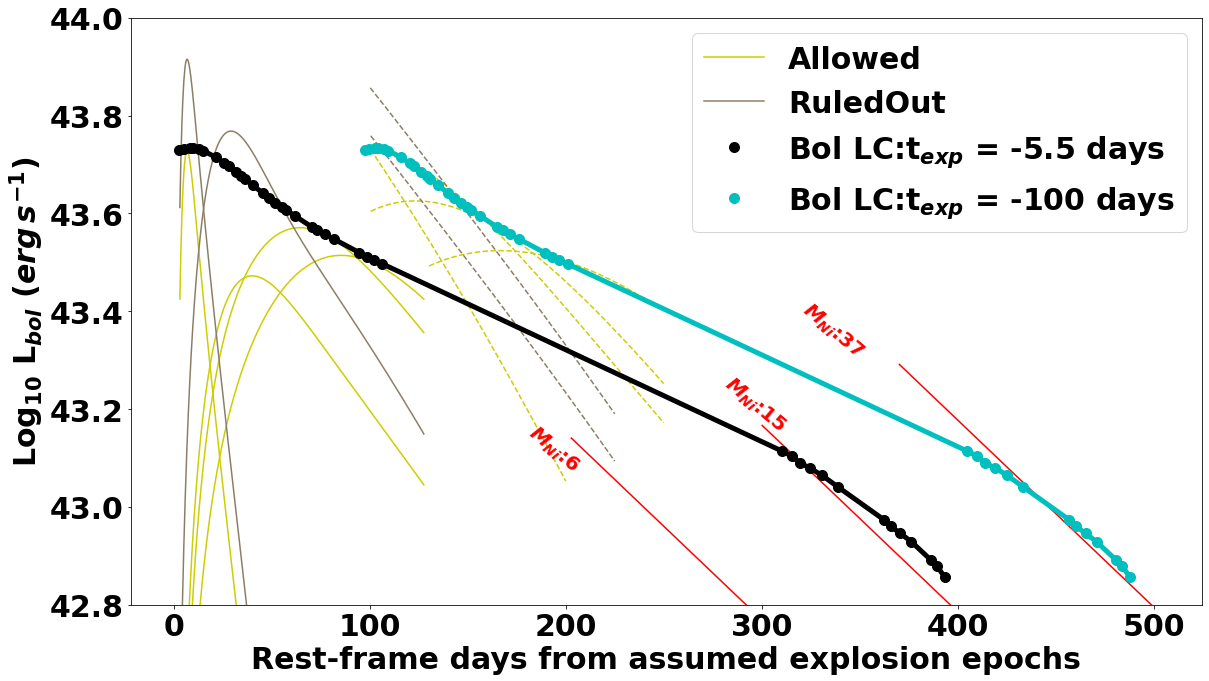

In [4]:
plt.figure(figsize=(19.20,10.80))
plt.rcParams.update({'font.size': 30})
from matplotlib import rc,rcParams
from pylab import *
from scipy import *
rc('font', weight='bold')

#plt.plot(time/86400.,np.log10(lum))#label = 'Nickel only')
file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
t = data1['tgmax']
luma = data1['lum']
lumerror =  data1['lum-error']
yerr =  lumerror
t100 = data1['t100']

#plot the bolometric LCs
plt.errorbar(t,np.log10(luma),fmt = 'ko',ms =10,label = r'Bol LC:t$_{exp}$ = -5.5 days')
plt.errorbar(t,np.log10(luma),fmt='k', ms =10,linewidth = 5)
plt.errorbar(t100,np.log10(luma),fmt = 'co',ms =10,label = r'Bol LC:t$_{exp}$ = -100 days', linewidth = 5)
plt.errorbar(t100,np.log10(luma), fmt='c',ms =10, linewidth = 5)

#late time fulltrap
dt_a, Lum_a  = ValentiNebFit(37,180,100,fulltrap=True)
dt_b, Lum_b  = ValentiNebFit(15,180,100,fulltrap=True)
dt_c, Lum_c  = ValentiNebFit(6,180,2.6,fulltrap=True)

#Call function for t0+5.5
time1, lum1  = ArnettFit(5.3,8,2.6)
time2, lum2  = ArnettFit(5,6,2.6)
time3, lum3  = ArnettFit(3,4,2.6)
time4, lum4  = ArnettFit(1.3,0.5,2.6)
time5, lum5  = ArnettFit(4.7,3,2.6)
time6, lum6  = ArnettFit(2,0.5,2.6)
#Call function for t0+100
time1a, lum1a  = ArnettFit(9.7,9.5,100)
time2a, lum2a  = ArnettFit(11.5,3.2,100)
time3a, lum3a  = ArnettFit(10.9,18.95,100)
time4a, lum4a  = ArnettFit(9.5,12.5,100)
time5a, lum5a  = ArnettFit(12.5,5,100)
time6a, lum6a  = ArnettFit(10,5,100)

#plot early t0+5.5
plt.plot((time1/86400)[1:500], (np.log10(lum1))[1:500],'#CDCD00',label ='Allowed')
plt.plot((time2/86400)[1:500], (np.log10(lum2))[1:500],'#CDCD00',)
plt.plot((time3/86400)[1:500], (np.log10(lum3))[1:500],'#CDCD00')
plt.plot((time4/86400)[1:500], (np.log10(lum4))[1:500],'#CDCD00')
plt.plot((time5/86400)[1:500], (np.log10(lum5))[1:500],'#8B7E66',label ='RuledOut')
plt.plot((time6/86400)[1:500], (np.log10(lum6))[1:500],'#8B7E66')
#plot early t0+100
plt.plot((time1a/86400)[1:600], (np.log10(lum1a))[1:600],'#CDCD00',linestyle ='--')
plt.plot((time2a/86400)[1:400], (np.log10(lum2a))[1:400],'#CDCD00',linestyle ='--')
plt.plot((time3a/86400)[120:600], (np.log10(lum3a))[120:600],'#CDCD00',linestyle ='--')
plt.plot((time4a/86400)[1:600], (np.log10(lum4a))[1:600],'#CDCD00',linestyle ='--')
plt.plot((time5a/86400)[:500], (np.log10(lum5a))[:500],'#8B7E66',linestyle ='--')
plt.plot((time6a/86400)[1:500], (np.log10(lum6a))[1:500],'#8B7E66',linestyle ='--')

#plot late t100 and t0+5.5
plt.plot(dt_a[270:],np.log10(Lum_a)[270:],'r')
plt.plot(dt_b[200:300],np.log10(Lum_b)[200:300],'r')
plt.plot(dt_c[200:498],np.log10(Lum_c)[200:498],'r')

#add the texts to specify the LC
#plt.text(340,42.95,'Mni:14',fontsize =12,ha='left', rotation=-40, wrap=True)
plt.text(280,43.25,r'$M_{Ni}$:15',color = 'r',fontsize =20,ha='left', rotation=-40, wrap=True)
#plt.text(370,42.95,'Mni:17',fontsize =12,ha='left', rotation=-40, wrap=True)

#plt.text(315,43.45,'Mni:35',fontsize =12,ha='left', rotation=-40, wrap=True)
plt.text(320,43.40,r'$M_{Ni}$:37',color = 'r', fontsize =20,ha='left', rotation=-40, wrap=True)
plt.text(180,43.15,r'$M_{Ni}$:6',color = 'r',fontsize =20,ha='left', rotation=-40, wrap=True)

plt.ylim(42.8,44)
plt.tick_params(labelsize=30)
plt.xlabel('Rest-frame days from assumed explosion epochs',fontsize =30, fontweight = 'bold')
plt.ylabel(r'Log$_{10}$ L$_{bol}$ $(erg\,s^{-1})$', fontsize =30, fontweight= 'bold')
plt.legend(fontsize =30)
#plt.show()
#plt.savefig('nickel_0.pdf')
plt.savefig('NimEjLC2.png',dpi = 300, transparent = True)